# PHYS20762 - Project - Modelling Neutron Penetration by Monte Carlo

Daniel Penaliggon<br>
10662377
University of Manchester  
April 2021

In [1]:
# importing python libraries
import numpy as np
import scipy.constants as pc

# Abstract 

This investigation aimed to simulate the penetration of neutrons through layers of water, lead and graphite, of various thicknesses by Monte-Carlo Methods, by simulating the processes of scattering and absorption. The attenuation length of each material for neutrons was found to be 1.72+/-0.06cm, 9.38+/-0.46 and 11.71+/-1.13cm for water, lead and graphite respectively. The reflection, absorption and transmission percentages were found for each material at a thickness of 10cm, and are given in section 4.  

# Introduction

This investigation aimed to model the penetration of neutrons through layers of material, by considering only absorption and scattering interactions. This was done using Monte-Carlo, i.e random Methods, which were first developed by scientists working on this exact content, for the developement of the first Atomic Bomb. Although this was the main focus of the investigation, the potential Monte-Carlo method/methods used for this had to be investigated before-hand. The investigation was therefore broken down into six sections: 

1) Investigating different Monte-Carlo methods in general, 

2) Investigating them further, in the contexts used to model neutron-matter interactions, 

3) The theory behind modelling neutron-matter interactions,

4) Conducting simulations of neutrons penetrating matter,

5) An alternate approach to simulating neutron penetration known as the "Woodcock Method". 

6) References. 

# Section 1: Investigating Different Monte-Carlo Methods

Due to the algorithmic nature of computation, it is practically impossible to generate a truly random sequence of numbers, i.e where each is completely independent of the rest of the sequence. Therefore the "random" numbers used throughout this investigation are so-called "pseudo-random numbers", which exhibit statistical randomness and so are un-biased, but are deterministic, meaning on number is generated based off the previous number, meaning the created sequence is exactly reproduceable. This section compares and introduces two of these methods.

## 1.1: Introducing Different Uniform Random Number Generators

### Linear Congruential Generators (LCG's)

LCG's are a type of uniform pseudo random number generator, which are defined by the following algorithm and parameter contrains: 

$$X_{n+1} = (aX_{n}+c) mod (m) \quad (1),$$
$$0 < m,$$
$$0 \leq a < m,$$
$$0< c < m,$$
$$0 \leq X_{0} < m,$$

For some seed $X_0$, increment $c$, multiplyer $a$, modulus $m$, and where $(a) mod (b)$ represents the "modulo" function of $a$ and $b$, returning the remainder of $\frac{a}{b}$. They can be normalised by dividing each term in the sequence by $m$, giving a uniform random distribution in the region $[0,1]$. Whilst the simplicity of LCG's makes them efficient, they have a number of shortcomings, the mosrt obvious being that they repeat with a period $m$. It can also be shown that all LCG's produce points that lie on "hyperplanes" [1] which in the case of 3D means that is the produced sequence is treated as a set of $x, y, z$ coordinates, they will be observed to lie on discrete 3D planes. However, by using a very large $m$ value (many LCG's use $2^{32}$), and by making sure that the "spectral error" bias of the LCG doesn't affect what it's being used to simulate, then LCG's are a good choice of uniform random number generator. 

An example of a normalised LCG, "randssp", is known to produce 3D hyperplanes, and has been coded below to allow later demonstration of spectral error. 

In [2]:
def randssp(p,q):
    
    # generates a (p x q) sized matrix of uniformally distributed pseudo-random numbers 
    # numbers are generated by an LCG algorithm 
    
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    return r 

### Numpy.Random.Uniform Function

The numpy.random.uniform function is a uniform random number generator from the python "numpy" library, and would be a convenient choice of random number generator for this investigation, due to it already being coded. 

## 1.2 :  Comparing Uniform Random Number Generators

This section compares the output of the two described random/pseudo-random number generators. Firstly, histograms of a number of sample sizes are plotted for each method, with the mean bin count $\mu$ and $\mu ± \sigma$ plotted by black and red dashed lines for each respectively. The fraction $\frac{\sigma}{\mu}$ will be calculated for each graph. 

In [3]:
# define a function to find the mean and standard deviations, then plot on histogram of a given axis
def hist_variables(data, ax, bin_number):
    
    # generate a histogram from the given data:
    counts = np.histogram(data, bins=bin_number)[0]
    
    # calculate the mean and standard deviation of the histogram bin counts:
    mean = np.mean(counts)
    error = np.std(counts)
    error_fraction = error / mean # also calculate the standard deviation as a fraction of the mean 
    
    # lines to display mu ± sigma:
    ax.hlines((mean - error), 0, 1, linestyle='dashed', colors='r', 
              label=r'$\sigma$ = {0:.2f}$\mu$'.format(error_fraction))
    ax.hlines((mean + error), 0, 1, linestyle='dashed', colors='r')
    
    # lines to display mu:
    ax.hlines(mean, 0, 1, linestyle='--', color='k')

    return mean, error

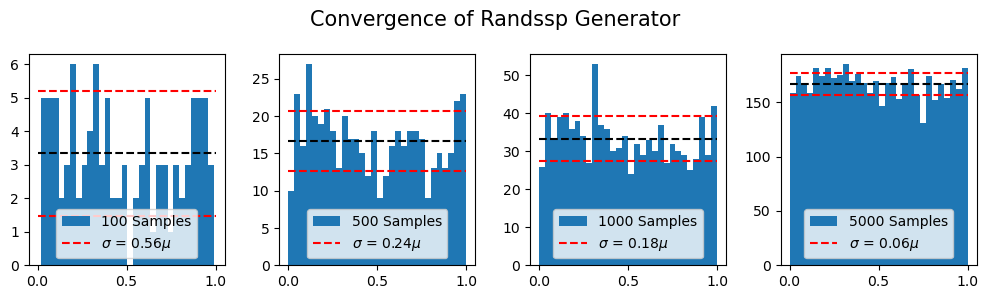

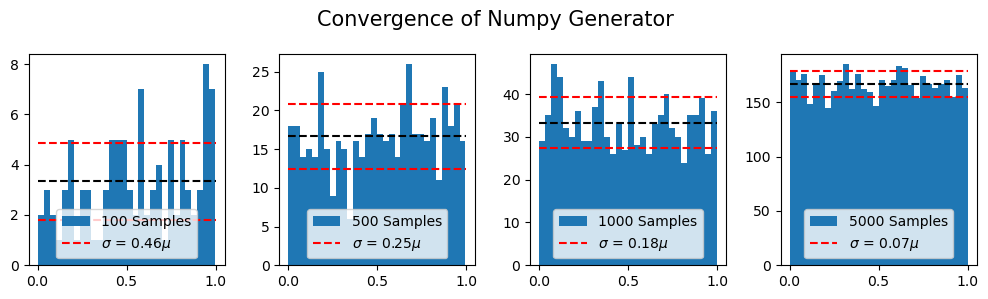

In [4]:
# making histograms non-interactive
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('default') 
plt.rcParams.update({'font.size':10}) 

# defining sample sizes and number of bins in each histogram:
sample_sizes = [100, 500, 1000, 5000]
n_bins = 30

# initialising plot:
fig1, axes1 = plt.subplots(1,len(sample_sizes), figsize=(10,3))
fig2, axes2 = plt.subplots(1,len(sample_sizes), figsize=(10,3))

# setting titles:
fig1.suptitle('Convergence of Randssp Generator', fontsize=15)
fig2.suptitle('Convergence of Numpy Generator', fontsize=15)

# plotting the described histogram for both methods at each sample size:
for i, n in enumerate(sample_sizes):
    
    # defining axes for each sample size:
    ax1 = axes1[i]
    ax2 = axes2[i]
    
    # generating data:
    randssp_sample = randssp(n, 1)
    numpy_sample = np.random.uniform(0, 1, n)
    
    # generating histograms, finding mean and standard deviation on the count for each:
    ax1.hist(randssp_sample, bins=n_bins, label='{0:.0f} Samples'.format(n))
    ax2.hist(numpy_sample, bins=n_bins, label='{0:.0f} Samples'.format(n))
    
    # finding means and std's, plotting on histograms
    numpy_mean, numpy_std = hist_variables(numpy_sample, ax1, n_bins)
    randssp_mean, randssp_std = hist_variables(randssp_sample, ax2, n_bins)
    
    # creating legends
    ax1.legend(loc='lower center')
    ax2.legend(loc='lower center')
    
# ensuring no overlap, showing plots: 
fig1.tight_layout()
fig2.tight_layout()
plt.show()

**Reminder**: the red dahsed lines on each histogram above denote $\mu ± \sigma,$ with the black dashed line denoting $\mu$, where $\sigma$ and $\mu$ are the standard deviation and mean of the bin counts of that histogram. 

From the above histograms, the $\frac{\sigma}{\mu}$ fractions calculated are shown to decrease for with sample size for each generator, showing them both to "relatively" converge. Observing the $n=100$ histograms, the calculated $\sigma$s are roughly half of the respective mean for each generator, with some bins having twice the counts of others while some have zero counts. This highlights the main error that needs accounting for with Monte-Carlo Methods, that the discrete nature of picking individual samples becomes very noticeable with small sample sizes, and should be constantly considered when using them to model physical processes. 

Considering random distributions in more depth; the Law of Large Numbers [2], describes that as the size $n$ of a randomly chosen sample set tends to infinity, its mean will tend to the true mean of the population. In the context of viewing uniform randomly generated data in a histogram, this can be interpreted as the mean bin count of $m$ bins tending to the "true mean" of $\frac{n}{m}$.

The histograms of uniform randomly generated data can be investigated in more statistical depth as well, by considering that theoreticaly, for $n$ bins a single value has a 1/n chance of being in a specific bin. Noting that there are only two outcomes for a specific sample and bin, either being in or not in the bin, these two attributed show that the probability distribution of a sample falling into a specific bin is binomially distributed. This gives it a theoretical standard deviation given by

$$\sigma_{\mu} = \sqrt{np(1-p)} = \sqrt{\mu(1 - \frac{\mu}{n})} \quad (2),$$

for an average bin count $\mu$. Therefore another good test of convergence is to plot $\frac{\mu_{generated}}{\mu_{theoretical}}$ against sample size to test sample mean convergence, and $\frac{\sigma_{generated}}{\sigma_{theoretical}}$, to test error convergence. $\frac{\sigma_{generated}}{\mu_{generated}}$ will also be plotted to see if count fluctations become negligable for a very large population size, which is required for this investigation. 

This will be done 50 times to allow all values to be averaged, to minimise random error.

In [5]:
# Define function to find the binomial mean and standard deviation of a histogram for some sample size and bin number:
def binomial_parameters(n_samples, n_bins):
    
    mean = n_samples / n_bins
    std = np.sqrt(mean * (1 - mean/n))
    
    return mean, std

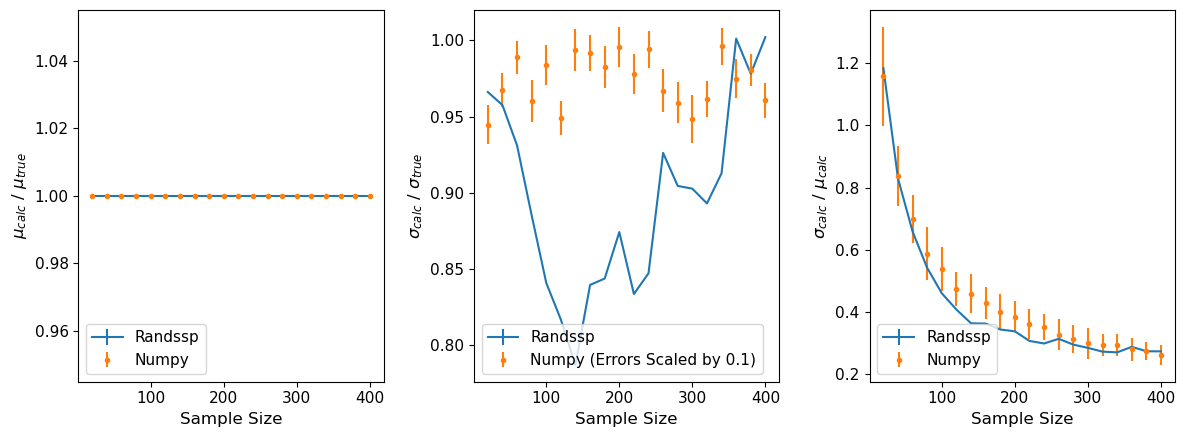

In [6]:
# making graphs non-interactive:
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('default') 
plt.rcParams.update({'font.size':11}) 

# define number of repeats and number of bins in each histogram:
n_bins = 30 
repeats = 50

# define parameters for and then generate sample size array:
sample_min = 20
sample_max = 400
n_samples = 20
sample_sizes = np.linspace(sample_min, sample_max, n_samples).astype(int)

# defining master arrays of randssp and numpy data, over which to average:
randssp_master_array = []
numpy_master_array = []

for i in np.arange(repeats):
    
    # creating arrays of data, of the mean_comparison, sigma_comparison, and sigma_convergence in order
    randssp_data = np.zeros((n_samples, 3))
    numpy_data = np.zeros((n_samples, 3))
    
    # iterating over sample sizes
    for j, sample_size in enumerate(sample_sizes):

        # generating data sets:
        randssp_sample = randssp(sample_size, 1)
        numpy_sample = np.random.uniform(0, 1, sample_size)    
        
        # generating histogram data:
        randssp_counts = np.histogram(randssp_sample, n_bins)[0]
        numpy_counts = np.histogram(numpy_sample, n_bins)[0]
        
        # calculate expected binomial error and true mean:
        true_mean, expected_sigma = binomial_parameters(sample_size, n_bins)
        
        # generating values to average:
        randssp_mean, numpy_mean = np.mean([randssp_counts, numpy_counts], axis=1)
        randssp_std, numpy_std = np.std([randssp_counts, numpy_counts], axis=1)
        
        # defining plotting values for this sample size:
        randssp_data[j,0], numpy_data[j,0] = [randssp_mean, numpy_mean] / true_mean
        randssp_data[j,1], numpy_data[j,1] = [randssp_std, numpy_std] / expected_sigma
        randssp_data[j,2], numpy_data[j,2] = np.array([randssp_std, numpy_std]) / np.array([randssp_mean, numpy_mean])
        
    # appending new arrays to master arrays:
    randssp_master_array.append(randssp_data)
    numpy_master_array.append(numpy_data)
    

# finding mean and standard deviations over all repeats:
av_randssp, av_numpy = np.mean([randssp_master_array, numpy_master_array], axis=1)
randssp_error, numpy_error = np.std([randssp_master_array, numpy_master_array], axis=1)

# creating plot:
fig, axes = plt.subplots(1, 3, figsize=(12,4.5))
y_labels = [r'$\mu_{calc}$ / $\mu_{true}$',
            r'$\sigma_{calc}$ / $\sigma_{true}$', r'$\sigma_{calc}$ / $\mu_{calc}$']

# creating labels for numpy data, as the errors were scaled for the second graph
numpy_labels = ['Numpy', 'Numpy (Errors Scaled by 0.1)', 'Numpy']

for i, ax in enumerate(axes):
    av_array = [av_randssp[:,i], av_numpy[:,i]]
    if i == 1:
        error_array = [randssp_error[:,i], numpy_error[:,i]*0.1]
    else: 
        error_array = [randssp_error[:,i], numpy_error[:,i]]
        
        
    
    ax.set_xlabel('Sample Size', fontsize=12)
    ax.set_ylabel(y_labels[i], fontsize=12)
    
    ax.errorbar(sample_sizes, av_array[0], error_array[0], label='Randssp')
    ax.errorbar(sample_sizes, av_array[1], error_array[1], fmt='.', label=numpy_labels[i])
    ax.legend(loc='lower left')
    
fig.tight_layout()
plt.show()

Observing the above graphs, it is firstly evident that the Randssp algorithm doesn't vary with repeats, i.e it produces the same sequence each time. This was mentioned in the LCG section above, and is a consequence of LCG's being entirely deterministic, in that each number is calculated directly from the last meaning that without varying the "seed" $X_0$ by some other random number generator, the algorithm will produce the same sequence each time as shown above by the Randssp errors being zero on all three graphs. This aspect of Randssp would lead to un-physical results in every context of this investigation, i.e the same set of isotropic directions produced each time with no random variation. Therefore, without interpreting any other parts of the above graphs, numpy.random.uniform is clearly the most suitable random number generator for this investigation out of the two described. Note that as a consequence Randssp will not be considered in any further analysis in this section. 

Examining the left-hand graph, which plots the ratio of $\frac{\mu_{calc}}{\mu_{true}}$, shows that for every sample size tested, the means are seemingly exactly the same, with no variation across repeats given by the zero errors for each sample size. This was first assumed to be a bug in code, but investigating further showed that despite correctly fluctuating histograms being plotted, the mean value is seemingly the same for each repeat, and matches to the binomially distributed mean exactly. This is likely attributed to the discrete nature and relatively small count numbers. Examining the $\frac{\sigma_{calc}}{\sigma_{true}}$ graph for the numpy generator shows that, with a very considerable errors, the ratio varies just under one (around 0.975), which is logical considering the bin counts are known to vary binomially, but it should be noted that modelling bin counts as binomial appears to overestimate these errors. 

While none of these results would cause explicit problems in the context of this investigation, the convergence of the 
$\frac{\sigma_{calc}}{\mu_{calc}}$ ratio to a negligable value, i.e relative fluctuations from the mean becoming negligable as the sample size tends to infinity is a very important physical attribute, and is used throughout this investigation. Observing the right hand graph however shows this to tend to zero over the shown range for both generators, confirming the numpy generator to be suitable for use in this investigation. 

## 1.3: Investigating "Spectral Error"

As stated before when introducing the Randssp generator, it is known to exhibit the so-called "spectral error" in three dimensions. It will therefore be used to generate 3D coordinates as an example of spectral error, while the numpy generator will also be used to generate coordinates to see if it exhibits this spectral error.

In [7]:
# define a 3D coordinate plotter, given some 3D coordinates and a specific axis:
def coordinate_plotter(coordinate_array, spectral_orientation, ax):
    
    # seperating data into coordinates, then plotting:
    x, y, z = np.split(coordinate_array, 3, axis=0)
    ax.scatter(x, y, z, s=5)
    
    # give option to display at a specific orientation:
    if spectral_orientation[0]:
        elevation, azimuth = spectral_orientation[1:]
        ax.view_init(elevation, azimuth)

<IPython.core.display.Javascript object>


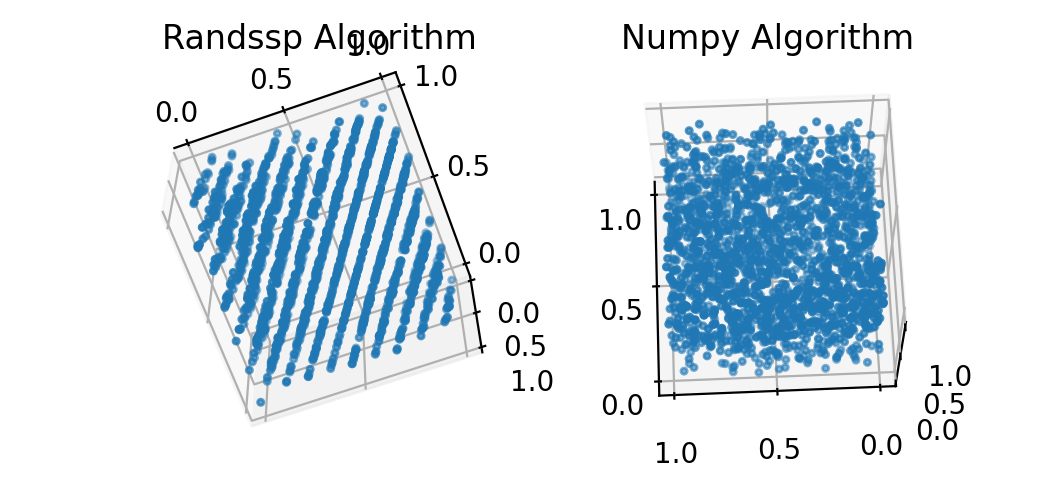

In [26]:
# enabling interactive 3D matplotlib plots:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('default') 

# defining the number of generated 3D points:
n_points = 2000

# generating both coordinate arrays: 
randssp_array = randssp(3 , n_points)
np_array = np.random.uniform(0, 1, (3, n_points))

# generating plot:
fig, axes = plt.subplots(1,2, figsize=(5.3,2.5), subplot_kw={'projection':'3d'})

# plotting both randssp and numpy points: 
coordinate_plotter(randssp_array, [True, 100, -80], axes[0])
coordinate_plotter(np_array, [False, 0, 0], axes[1])

# set titles for each:
axes[0].set_title('Randssp Algorithm')
axes[1].set_title('Numpy Algorithm')

plt.show()

Examining the left Randssp generated coordinates clearly exhibits the spectral error as previously described, where points are generated with a bias such that they form discrete planes when plotted as coordinates. Even aside from the geometric interpretation of this error, it clearly shows bias in a supposedly random series of numbers, meaning any evidence of it in the numpy generator would make it unsuitable for the investigation. 

However examing the interactive Numpy plot from all angles shows no discrete planes are formed, meaning it exhitits no apparent bias and is therefore a good choice of random number generator for this investigation. 

-------------

# Section 2: Examining Monte-Carlo in Context

Now that numpy.random.uniform has been confirmed as a suitable uniform random number generator, it will now be examined in the contexts used in this investigation, namely in generating exponentially distributed distances, and isotropic vectors. Monte-Carlo methods are also used to determine the nature of specific neutron interactions, i.e if a neutron is scattered or absorbed given a specific collision, but this is trivial and requires no further investingating. 

## 2.1 : Investigating Isotropic Vectors

<IPython.core.display.Javascript object>


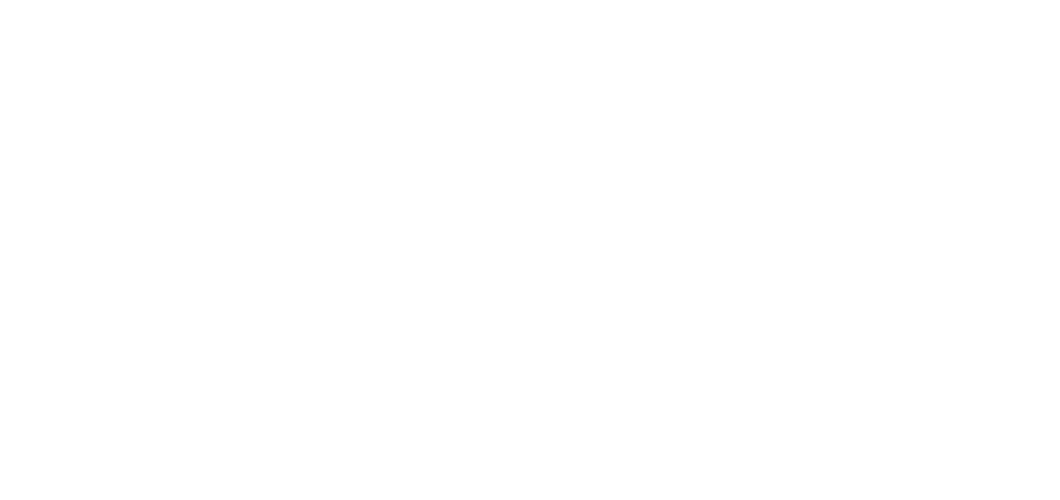

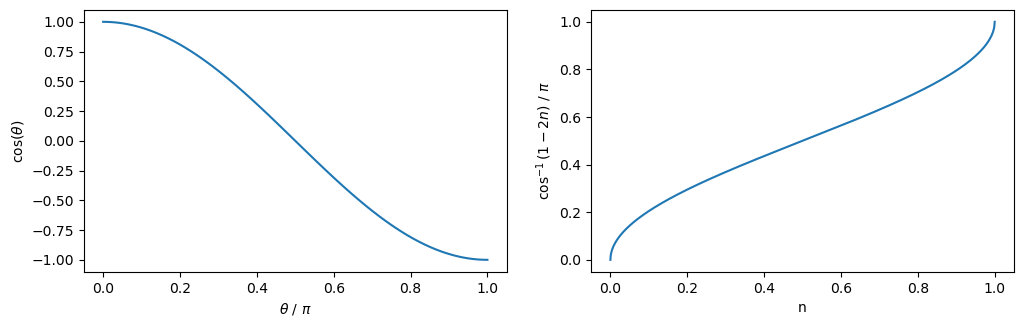

In [9]:
# plotting consine and inverse cosine graphs
# making graphs non-interactive:
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default') 


# define variables
x1 = np.linspace(0, 1, 100)
y1 = np.cos(np.pi*x1)
x2 = np.linspace(0, 1, 1000)
y2 = np.arccos(1 - 2*x2) / np.pi

# plotting
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 3.4))
ax1.plot(x1, y1) # plotting both functions
ax2.plot(x2, y2)
ax1.set_xlabel(r'$\theta$ / $\pi$') # setting x and y labels
ax2.set_xlabel('n')
ax1.set_ylabel(r'$\cos(\theta)$')
ax2.set_ylabel(r'$\cos^{-1}{(1 - 2n)}$ / $\pi$')
plt.show()

One of the main uses of a uniform ranodm number generator is generator isotropic, i.e uniformally distributed direction-wise, vectors. The most obvious way of generating seemingly isotropic unit (unit as only direction is being investigated here) vectors is through polar coordinates, where ${\theta} \in [0,\pi]$, and ${\phi} \in [0,2\pi]$, and are uniformally generated throughout these ranges. These will then be converted by the known equations;

$$x = r\sin(\theta)\cos(\phi),$$
$$y = r\sin(\theta)\sin(\phi),$$
$$z = r\cos(\theta),$$

to cartesian form, where to make them unit vectors $r = 1$ will be taken.

However, observing the above cosine graph shows that using a uniform randomly generated $\theta$, $\cos({\theta})$ input would give a biased output, with the values at the ends of the displayed region much more likely to be picked than those at the centre, due to the gradient of the function. One way of to counter this is to distribute the $\theta$ values by the $\arccos{(1 - 2n)}, n \in [0,1]$ for a uniform randomly generated n. This can be understood by the arccosine function having an inverse bias to the cosine function, and therefore perfectly balancing the bias. 

Note that the above bias is only noticable in the $z$ coordinate, and will therefore only be accounted for in this case. 

To investigate this, seemingly isotropic unit vectors will be plotted below using both the uniformally generated and inverse cosine generated methods to examine any potential bias.

<IPython.core.display.Javascript object>


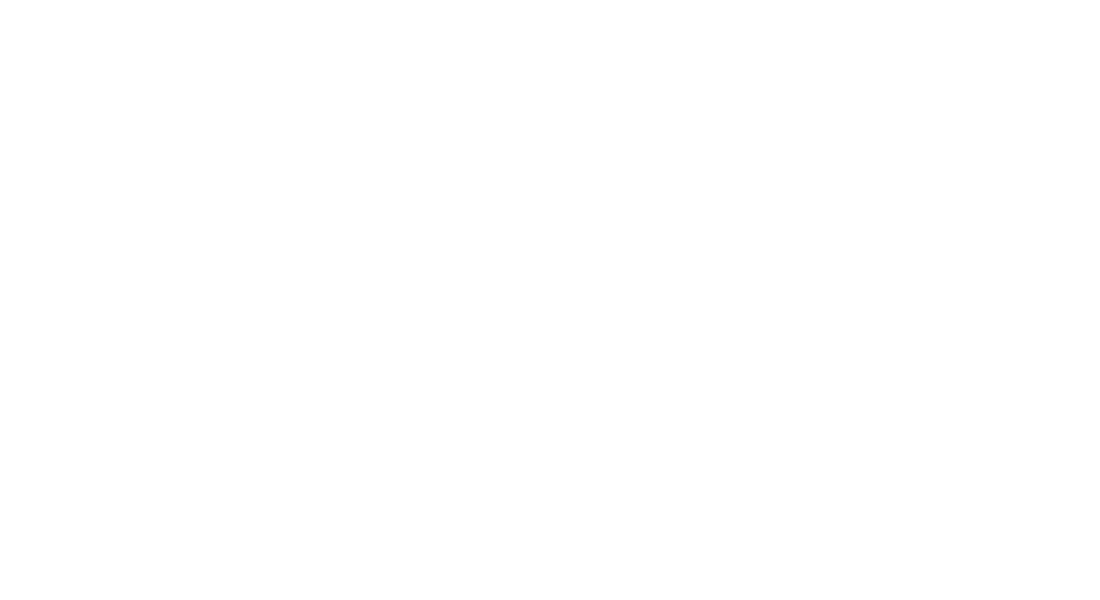

In [10]:
# making coordinate plots interactive:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('default')

# setting number of data points:
n_points = 3000

# coding generator as a function:
def vector_generator(r_array, theta_array, phi_array):

    # converting to cartesian coordinates (in whole arrays): 
    x_array = r_array * np.sin(theta_array) * np.cos(phi_array)
    y_array = r_array * np.sin(theta_array) * np.sin(phi_array)
    z_array = r_array * np.cos(theta_array)
    return x_array, y_array, z_array

# defining uniform and weighted theta and phi coordinates: 
uniform_thetas = np.random.uniform(0, np.pi, n_points)
weighted_thetas = np.arccos(1 - 2*np.random.uniform(0, 1, n_points))
phis = np.random.uniform(0, 2*np.pi, n_points)

# generating both sets of cartesian coordinates:
uniform_coordinates = vector_generator(1, uniform_thetas, phis) 
weighted_coordinates = vector_generator(1, weighted_thetas, phis)
master_coordinate_array = [uniform_coordinates, weighted_coordinates]

# defining titles
titles = ['Uniformally Distributed Coordinates', 'Inverse Cosine Distributed Coordinates']

# plotting on a scatter graph: 
fig, axes = plt.subplots(1, 2, figsize=(5.5,3), subplot_kw={'projection': '3d'})
for i, ax in enumerate(axes):
    x, y, z = master_coordinate_array[i][:]
    ax.scatter(x, y, z, s=1)
    ax.set_title(titles[i])
plt.show()

Investigating the above 3D interactive plots from all angles reveals two poles in the uniform distribution corresponding to $z = ±1$ or $\theta = 0,\pi$ , and no poles on the weighted distribution, as predicted. This could be further examined by quantitatively investigating the density of points (points per solid angle), over the unit sphere, but that is beyond the scope of this sub-investigation. 

## 2.2 : Investigating Exponential Distributions

The other main use of Monte-Carlo Methods in this investigation is producing exponentially distributed distances, which can be generalised as values generates from the $p(x) = e^(-x/\lambda)$ for some mean value $\lambda$. This is most easily done by the **inverse distribution sampling** method. It can be shown that given the inverse cumulative distribution $p_{c}^{-1}$ of some probability distribution $p(x)$, using normalised (in the range [0,1]) uniform randomly generated numbers as the input of $p_{c}^{-1}$ gives an output of $x$ value that are distributed by $p$. By integrating $p(x) = e^(-x/\lambda)$, it can be shown that 

$$p_c(x) = 1 - e^{-x/\lambda} \quad (3),$$

$$p_{c}^{-1} = -\lambda\log({1 - n}),  n \in [0,1] \quad (4),$$

for a uniform randomly generated $n$. However, it can be noted that $(1 - n), n \in [0,1]$ is itself a normalised uniform random distribution, meaning computationally this can be simplified to 

$$p_{c}^{-1} = -\lambda\log({n}), \quad n \in [0,1] \quad (5).$$

Therefore we can code $p_{c}^{-1}$, in the context of $x$ being a distance using the numpy generator, as a function below. Note that in this context $<x>$ is known as the "mean free path".

In [11]:
def exp_distances(mean_free_path, n_values):
    
    # generate random uniformally distributed array:
    uniform_random_array = np.random.uniform(0, 1, n_values)
    
    # feed random array into inverse exponential to give exponential distances:
    distance_array = -mean_free_path * np.log(uniform_random_array)
    
    return distance_array

This function will be used to generate 100, 1000, and 5000 distances for a mean free path of 1m, which will be represented as histograms below. 

<IPython.core.display.Javascript object>


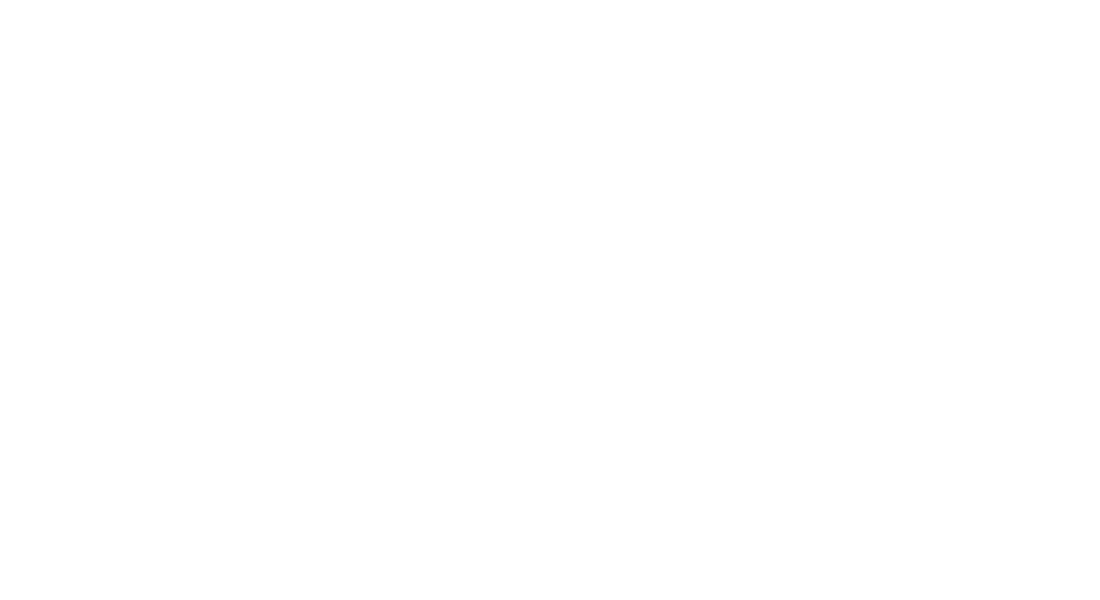

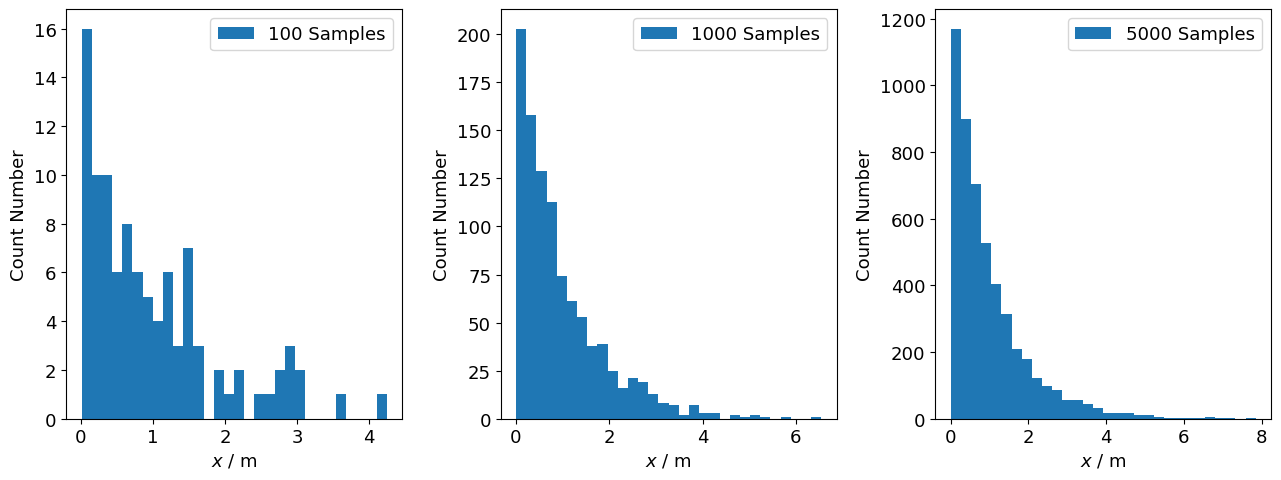

In [12]:
# making graphs non-interactive:
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default') 
plt.rcParams.update({'font.size':13}) 

# defining constants:
mfp = 1 # in m 
n_bins = 30
n_distances = [100, 1000, 5000]

# generating distances:
exp_distances_1 = exp_distances(mfp, n_distances[0])
exp_distances_2 = exp_distances(mfp, n_distances[1])
exp_distances_3 = exp_distances(mfp, n_distances[2])
exp_distances_array = [exp_distances_1, exp_distances_2, exp_distances_3]

# plotting histograms:
fig, axes = plt.subplots(1, 3, figsize=(13,5))

for i, ax in enumerate(axes):
    
    # label axes
    ax.set_xlabel('$x$ / m')
    ax.set_ylabel('Count Number')
    
    # plot histograms with legend
    ax.hist(exp_distances_array[i], n_bins, label='{0:.0f} Samples'.format(n_distances[i]))
    ax.legend(loc='best')
    
fig.tight_layout()
plt.show()

Looking at the above graphs highlight a few errors associated with modelling continuous distributions with distcrete histograms for a non infinite number of particles. As will be discussed later, this distribution will be used to model the equation of neutron attenuation through a layer of master, which is given by 

$$N = N_{0}e^{-x/\lambda} \quad (6).$$

However this function doesn't account for the discrete nature of neutrons (or it wouldn't be analytic), meaning approximating it with a finite number of neutrons will create problems, such as the random error of the count fluctiations and bins with zero counts, which become increasingly likely for small population sizes. This last error in particular will raise errrors in future, when $\log{(N)}$ for a count $N(x)$ will be taken, which is obviously un-physical for $N=0$, as the continuous nature of equation (6) models the count to only ever attenuate to zero at an infinite distance. Counter acting the first problem of random fluctuations is simply to use large population sizes, and potentially average this over a number of repeats, as was done in section 1) when comparing random number generators. Counter-acting the second issue is more context dependent, and will be discussed throughout the investigation when appropriate. 

Noting that considering only absorption, neutrons have a mean free path in water of 0.450m, this can used to model the attenuation of neutrons in water. Note that by treating the bar midpoints and count numbers of the above histograms as $x$ and $N$ values, we can actually fit equation (6) to the randomly generated data set to determine the "generated" mean free path $\lambda$. Although we obviously know the true mean free path, this process of fitting discrete exponential data is necessary at the end of the investigation and will highlight any more errors that need to be accounted for. 

Equation (6) is much easier to fit in its linearised form:

$$\ln{(N)} = -\frac{1}{\lambda}(x) + \ln{(N_0)} \quad (7).$$

Note that all errors propogated in this investigation use the standard formula:

$$\sigma_{f}^2 = (\sigma_a \frac{\partial f}{\partial a})^2 + (\sigma_b \frac{\partial f}{\partial b})^2 + ..., f(a,b,...) \quad (8)$$ 

Calculating this below for 10000 neutrons, and repeating 200 times before taking an average to fit from:

In [13]:
# defining a reduced chi^2 function to evaluate the goodness of fit:
def reduced_chi_squared(data, errors, model):
    return np.sum( (data - model)**2 / errors**2) / len(data)

# define exponential curve and linear curve functions:
def exponential_curve(x, mfp):
    return np.exp(-x/mfp)
def linear_curve(x, m, c):
    return (m*x) + c

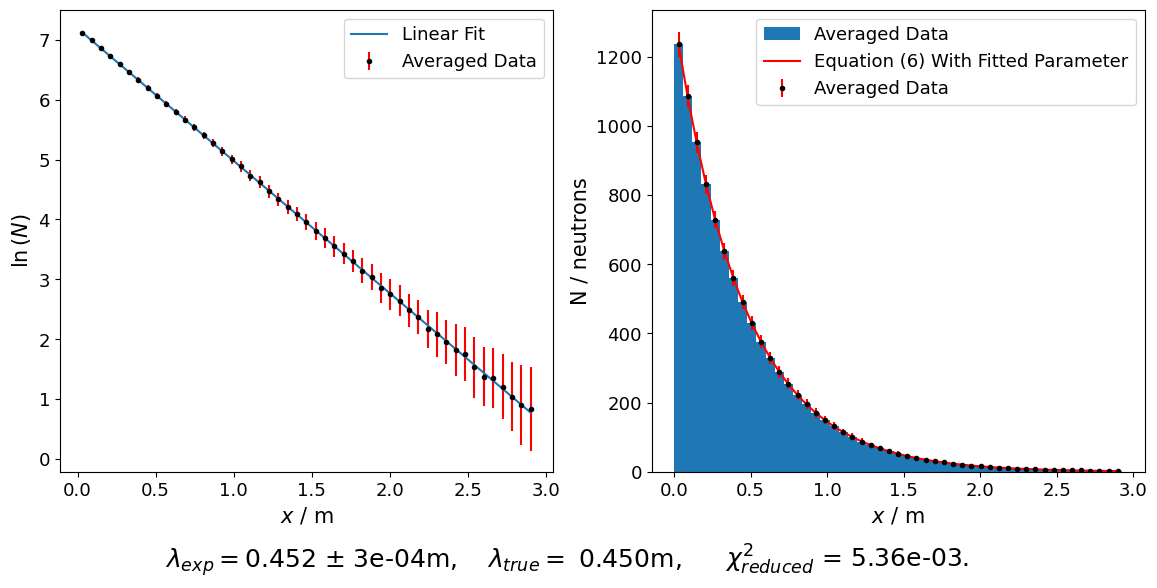

In [14]:
# making plots non-interactive:
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default') 
plt.rcParams.update({'font.size':13}) 

# defining parameters:
mfp_water = 0.450 # in m
bin_number = 50
repeat_number = 200
n_neutrons = 10000
max_distance = 3 # in m
bin_width = max_distance / bin_number

# randomly generating 200 sets of data: 
count_master_array = np.zeros((repeat_number, bin_number))
for i in np.arange(repeat_number):
    
    # generating uniformally distributed points, then plugging into inverse CDF function:
    water_xvals = exp_distances(mfp_water, n_neutrons)
    water_xvals = water_xvals[water_xvals < max_distance]
    
    # calculating counts for each repeat, including bin numbers on one: 
    counts, bin_edges = np.histogram(water_xvals, bin_number)
    mids = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    count_master_array[i] = counts
    
# calculating standard deviation and mean on count number data:
av_counts = np.mean(count_master_array, axis=0)
count_errors = np.std(count_master_array, axis=0)

# last point was observed to be erroneous and so is removed 
mids, av_counts, count_errors = np.delete([mids, av_counts, count_errors], -1, axis=1)
bin_edges = np.delete(bin_edges, -1, axis=0)

# removing points with zero errors to avoid weighting issues
anomalous_args = np.where(count_errors < 0.0001)
mids, av_counts, count_errors = np.delete([mids, av_counts, count_errors], anomalous_args, axis=1)
bin_edges = np.delete(bin_edges, anomalous_args, axis=0)

# calculate linear plot y variables:
ln_Ns = np.log(av_counts)
ln_N_errors = (count_errors/av_counts) # error on ln(x) is the fractional error on x

# fit linear plot:
(gradient, intercept), cov_matrix = np.polyfit(mids, ln_Ns, 1, w=(1/ln_N_errors), cov=True)
fitted_d = 1 / (-gradient)
fitted_d_error = fitted_d * ((np.diag(cov_matrix)[0] ** 0.5) / -gradient)

# calculating the reduced chi^2 of the fit:
modelled_ln_N = linear_curve(mids, gradient, intercept)
fit_reduced_chi = reduced_chi_squared(ln_Ns, ln_N_errors, modelled_ln_N) 

# calculate exponential plot variable
analytic_counts = av_counts[0] * exponential_curve((mids-0.5*bin_width), fitted_d)

# plotting the fit: 
fig, axes = plt.subplots(1,2, figsize=(14,6))
ax1, ax2 = axes

# plotting the linear fit of equation (6)
ax1.errorbar(mids, ln_Ns, ln_N_errors, fmt='k.', ecolor='r', label='Averaged Data') 
ax1.plot(mids, linear_curve(mids, gradient, intercept), label='Linear Fit') 
ax1.set_ylabel('$\ln{(N)}$', fontsize=15)
ax1.legend(loc='upper right')

# plotting the fit in the exponential context, i.e equation (6):
ax2.hist(bin_edges[:-1], bin_edges, weights=av_counts, label='Averaged Data')
ax2.plot(mids, analytic_counts, color='r', label='Equation (6) With Fitted Parameter')
ax2.errorbar(mids, av_counts, count_errors, fmt='k.', ecolor='r', label='Averaged Data') 
ax2.set_ylabel('N / neutrons', fontsize=15)
ax2.legend(loc='upper right')

# displaying the fitted and true mean free paths at the bottom of the plots: 
fig.text(0.20,-0.05, '$\lambda_{{exp}} = ${0:.3f} ± {1:.0e}m,'.format(fitted_d, fitted_d_error), fontsize=18)
fig.text(0.43,-0.05, '$\lambda_{{true}} =$ {:.3f}m,'.format(mfp_water), fontsize=18)
fig.text(0.60,-0.05, '$\chi_{reduced}^2$' + ' = {0:.2e}.'.format(fit_reduced_chi), fontsize=18)

# setting x axis label for both plots:
for i, ax in enumerate(axes):
    ax.set_xlabel('$x$ / m', fontsize=15)

plt.show()

When the above code was initially carried out, it was noticed the previously mentioned error of bins having a zero count became noticeable after roughly 3m. Noting that the purpose of this sub-investigation was to fit the data to equation (6) and hence determine the mean free path $\lambda$ of water, these later data points are actually not necessary as due to 50 bins being used to generate the histograms, there are enough points before this region to obtain an accurate fit. Therefore the data in the 3m and above region was omitted early on. 

As the linear fit used above used the error on each data point to weight the necessity of going through it (importance being weighted by $\frac{1}{\sigma}$, as points will smaller $\sigma$s are more accurate should be considered more important for the fit to predict), any points with negligably small errors will raise division by zero math errors. However as these points are rare comapred to those with non zero error bars, removing them from the data set for purely analytic purposes doesn't affect the overall fit and therefore was done above. However, it was also noticed when plotting the fitted data, for equation (6), that the last data point was always a noticeable outlier. Although there will be an insightful statistical or physical reason for this, it was decided that for the purposes of this investigation that this was not worth considering aside from noting its presence, and so it was removed from the data set. 

Using the $\chi_{reduced}^2$ and the left hand plot to analyse the goodness of fit show it to be very accurate. Normally such a small $\chi_{reduced}^2$ would indicate overestimated errors, but in this case the accuracy of the points is due to averaging the 200 generated data sets, and the errors have been directly calculated from this, so the fractional $\chi_{reduced}^2$ can be interpreted as every data point being a fraction of a standard deviation from the model. 

## 2.3 : Combining Isotropic Vectors and Exponential Distances

Now that the errors associated with generating isotropic vectors and exponentially distributed distances form a uniform random number generator have been investigated, the two can be combined to form an isotropic exponential vector generator. This will be used extensively throughout the investigation later. 

In [15]:
# coding isotropic vector generator as a function:
def isotropic_exp_vector_generator(mfp, n_vectors, into_slab):

    
    # generating neutron travelling at a normal angle into the slab as it starts off: 
    if into_slab:
        phi_array = np.zeros(n_vectors) # phi array
        theta_array = np.zeros(n_vectors)
        theta_array[:] = np.pi / 2 # theta array
        
    # else generating its weighted theta and phi coordinates:
    else: 
        phi_array = np.random.uniform(0, 2*np.pi, n_vectors)
        theta_array = np.arccos(1 - 2*np.random.uniform(0, 1, n_vectors))
    
    # generating exponentially distributed r values:
    r_array = exp_distances(mfp, n_vectors)

    # converting to cartesian coordinates (in whole arrays): 
    x_array = r_array * np.sin(theta_array) * np.cos(phi_array)
    y_array = r_array * np.sin(theta_array) * np.sin(phi_array)
    z_array = r_array * np.cos(theta_array)
    
    coords = np.column_stack((x_array, y_array, z_array))
    
    return coords

-------------

# Section 3: Theory of Neutron-Matter Interactions

Now that numpy.random.uniform has been vetted as an appropriate random number generator, in general and in the context of this investigation, the main body of the investigation, i.e simulating the penetration of neutrons through a medium. As an overview: neutrons will be modelled as entering a "slab" of material of definitie thickness, in which scattering and absorption processes are possible. To define these:

**Scattering**: the collision of a neutron with a so-called "scattering center" in the material , resulting in a random change of direction. 

**Absorption**: the collision of a neutron with a so-called "absorption center" in the material, resulting in the neutron being absorbed by the material. 

The interactions of neutrons in matter can therefore be broken down into the "free paths" in between these interactions. This is elaborated on in the theory section below. 

## 3.1 : Modelling Individual Processes

The processes that occur when neutrons interact with some material, i.e scattering and absorption, are seperately modelled by their "microscopic cross section", $\sigma$, in that material. Note that $\sigma$ is used to represent standard deviation and cross section in this investigation, but the choice will be obvious from context of its use. By the way microscopic cross-sections are defined, the number of neutrons that haven't collided with a previously mentioned "process centre", $I(x)$, for neutrons incident on a "thin" layer of material is given by 

$$I(x) = -{\Delta}I = n{\sigma}I_0L \quad (9),$$

for an initial neutron intensity, $I_0$, at the start of the layer. Although a definition of the "thin layer" requirement for this equation to hold exists, it is not discussed in this investigation, which assumes it to hold in all contexts. Examining equation (9) in the context of the "free path distance" discussed before allows us to define the free path $x$ as $x = L$, of the $I(x)$ neutrons that still haven't collided. Substituting $x$ for $L$ in equation (9) and differentiating with respect to $x$ gives the rate of that process, $R$, as
$$ R = (-)\frac{dI}{dx} = n{\sigma}I \quad (10),$$

which can be solved as a differential equation of $I$ in terms of $x$, giving

$$I(x) = I_0e^{-n{\sigma}x} = I_0e^{-x/\lambda} \quad (11),$$

where $\lambda = \frac{1}{n{\sigma}}$, which can be shown by expectation values to be the average distance penetrated, or "mean free path". $p(x)$, the probability of reaching a distance $x$ can therefore be expressed (although only accurate for a large number of neutrons) as

$$ p(x) = e^{-x/\lambda} \quad(12),$$

which we was introduced in section (2) without derivation. From $p(x)$ we generate exponentially distributed distances by the inverse distribution sampling method described and used in section 2.

## 3.2 : Modelling Multiple Processes

When multiple processes occur, it is useful to define the "macroscopic cross section" of a single process, $\Sigma = n\sigma$, where therefore  $\lambda = \frac{1}{\Sigma}$ follows from the previous $\lambda$ definition. If the PDF's of all processes are in the form of equation (4), it follows that 

$$\Sigma_{tot} = n_{1}\sigma_1 + n_{2}\sigma_2 + ... \quad (13)$$

defines the total macroscopic cross section of all processes, giving $\lambda_{tot} = \frac{1}{\Sigma_{tot}}$, the total mean free path of a neutron, considering any event that could occur. This lets us model free neutron paths as being exponentially distributed, with a mean free path of $\lambda_{tot}$. At the end of one of these paths, i.e when a specific neutron collides with an interaction center, we can define the probabiolity of scattering or absorption as $p_S$ and $p_A$:

$$ p_A = \frac{\Sigma_A}{\Sigma_A + \Sigma_B} \quad , \quad p_B = (1 - p_A). \quad (14)$$

Therefore at the end of any free path, we generate a random variable $n \in [0,1]$, and assert that the event will be adsorption if $n < p_A$, and be scattering elsewhere.

# Section 4: Investigating Neutron Penetration Through a Material

## 4.1 : Introduction to the Model

The two previously investigated techniques, of isotropic vectors and exponentially distributed distances used in combination to generate isotropic vectors with magnitudes that are exponentially distributed, which was defined as a function in section (2.3). As described before in the introduction of section (3), the scattering of a neutron gives it a new random direction, on which its path is again exponentially distributed, meaning the function in (2.3) models this exactly. 

The different parameters used in this investigation, i.e the scattering probability and total mean free path are calculated below. 

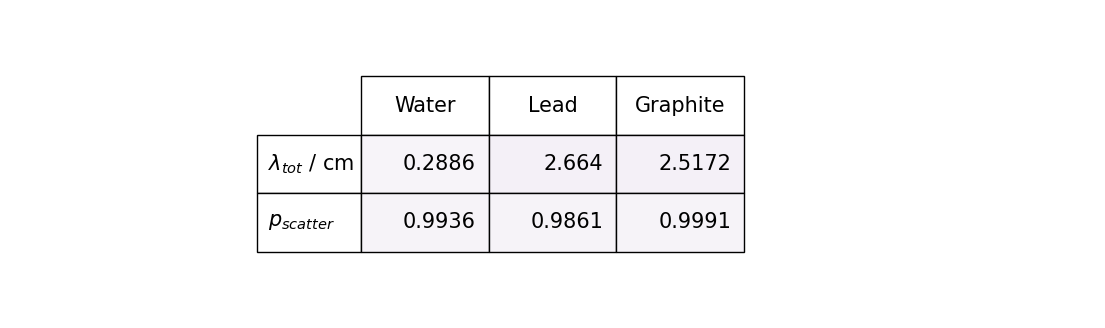

In [16]:
# re-setting plotting font
plt.rc('font', family='DejaVu Sans')
plt.rcParams.update({'font.size':15}) 

# densities, molar masses and cross sections in S.I units for water, lead, and graphite in order:
densities = np.array([1, 11.350, 1.670])
mol_masses = np.array([18.01528, 207.2, 12.011])
absorption_sigmas = np.array([0.6652, 0.158, 0.0045])*10**(-24)
scattering_sigmas = np.array([103, 11.221, 4.74])*10**(-24)
total_sigmas = absorption_sigmas + scattering_sigmas

# defining characteristic distance calculating function
def mean_free_path(cross_section, density, mol_mass):
    n = (density * pc.N_A) / mol_mass
    return 1 / (cross_section * n)

# define scattering probability function for a given material
def scattering_probability(sigma_scatter, sigma_absorb):
    return sigma_scatter / (sigma_scatter + sigma_absorb)

# calculating process specific and total mean free paths in cm:
absorption_mfps = mean_free_path(absorption_sigmas, densities, mol_masses)
scattering_mfps = mean_free_path(scattering_sigmas, densities, mol_masses)
total_mfps = mean_free_path(total_sigmas, densities, mol_masses)

# calculating the scattering probability, p_S for a given materials:
scattering_probabilities = scattering_probability(scattering_sigmas, absorption_sigmas)
absorption_probabilities = 1 - scattering_probabilities

# displaying these as a table:
# generating figure and axes:
fig, axes = plt.subplots(1,3, figsize=(14,4))

# removing actual axes, then setting the table in the middle axis
for ax in axes:
    ax.axis('off')
ax = axes[1]

# setting row and column labels for each table:
row_labels = [r'$\lambda_{tot}$ / cm', '$p_{scatter}$']
material_names = ['Water', 'Lead', 'Graphite']

# organise table data:
table_data = np.array([total_mfps, \
                      scattering_probabilities])

# generating the table:
table = ax.table(cellText=np.round_(table_data, decimals=4),
                                   rowLabels=row_labels,
                                   colLabels=material_names,
                                   cellColours=plt.cm.PuRd(table_data/100),
                                   loc='center',
                                   colWidths=[0.2 for x in material_names])

# resizing the table and showing the table:
table.scale(2.0,3.5)
plt.show()

# combining these into a physical parameters array to be used later:
thicknesses = np.zeros(3)
physical_parameters = np.column_stack((total_mfps, scattering_probabilities, thicknesses))

In light of the above $\lambda$ values, approximating the boundary of a reactor tank for example as an ininite plane with respect to the neutrons path lengths is incorrect as they are of the same order ($10^0$m). However, this approximation will be made initially as it will greatly simplify the physical situtation. 

The situation can therefore be physically interpreted as neutrons being incident on an infinite plane of material, where the initial distribution of directions is isotropic (due to the chaotic nature of the in-tank neutron "bath"). The material slab will be taken to be in the $y-z$ plane starting at $x=0$ with the neutron bath in the $x<0$ region. Each neutron will be modelled step-wise, i.e by generating a series of vectors isotropic in direction (except for the first one which must have a positive $x$ component to enter the slab), with a size determined by equation (4), using $\lambda_{tot}$ as previously mentioned. For each vector generated, equation (8) will be used in the previously described method to determine whether the evemt is the neutron being absorbed or scattered. If scattered a new vector is generated and the process repeats, if absorbed, the process ends. The total outcomes for this process, in a slab of definite thickness, are the neutron being "back-scattered" back into the neutron-bath, being absorbed in the slab, or being transmitted through the layer. 

As mentioned before this process will be done initially for one neutron, and then a larger number, or "flux" of neutrons. 

## 4.2 : Modelling a Single Neutron

The neutrons random walk will be ended if the neutron is either absorped, or leaves the medium by back scattering or transmission, which is an example of **Markov Chain Monte-Carlo**. A function will be coded below to determine this, and pass through the reason for path termination. 

The overall process will be iterative:
generate vector with positive x direction and exp distance 
find out if terminated 
if not, generate another vector
repeat until termination

In [17]:
def single_random_walk(physical_params):

    # unpacking physical parameters, convert mean free path to meters:
    mfp_tot, p_scatter, thickness = physical_params
    mfp_tot = mfp_tot * 10 **(-2)

    # define scatter count i and random_walk_terminated variable:
    i = 0
    random_walk_terminated = False
    
    # define initially empty coordinate history array:
    x_history = [0]
    y_history = [0]
    z_history = [0]
    
    while not random_walk_terminated:
        
        # is this the first step?
        if i == 0:
            x_step, y_step, z_step = isotropic_exp_vector_generator(mfp_tot, 1, True)[0]
        else: 
            x_step, y_step, z_step = isotropic_exp_vector_generator(mfp_tot, 1, False)[0]
    
        # update coordinate position histories:
        x_history.append(x_history[i] + x_step)
        y_history.append(y_history[i] + y_step)
        z_history.append(z_history[i] + z_step)
        x_position = x_history[i+1]
        
        # testing to see if/how the random-walk has been terminated:
        # generate random number n to determine if absorbtion occurs:      
        n = np.random.uniform(0, 1, 1)
        
        # has neutron been successfully transmitted?
        if x_position > thickness:
            random_walk_terminated = True
            reason ='transmission'
        
        # or back-scattered?
        elif x_position < 0:
            random_walk_terminated = True
            reason = 'reflection'
    
        # has the neutron been absorbed?
        elif n > p_scatter:
            random_walk_terminated = True
            reason = 'absorbtion'
    
        # random walk not terminated!
        else:
            random_walk_terminated = False 
            reason = 'ERROR'
            i += 1 
        
    return x_history, y_history, z_history, reason

This random walk will be done for all three processes, until a path ending with reflection, absorption, and transmission has occured for each. These will then be plotted. Therefore a function will be coded below that runs the above mean free path generating function until a set of histories for each outcome is generated. 

In [18]:
# define a function to iterate over the above single neutron random walk generator, until a path history for each 
# of the possible outcomes is recorded:

def random_walk_collector(physical_params):
    
    # set all outcome markers to false, set number of histories count to 0:
    reflected = False
    absorbed = False
    transmitted = False
    histories_recorded = 0
    
    # create an empty array to append neutron histories to, in the order of reflected, absorbed, transmitted:
    coordinate_histories = [0,0,0]
    
    # iterate until all are true, i.e all outcomes have been recorded:
    while not (reflected and absorbed and transmitted):
        
        # simulate a random walk:
        x_array, y_array, z_array, termination_reason = single_random_walk(physical_params)
        coordinates = np.column_stack((x_array, y_array, z_array))

        # catagorise the reason for terminating the random walk: 
        if termination_reason == 'reflection':
            reflected = True
            coordinate_histories[0] = coordinates
            
        elif termination_reason == 'absorbtion':
            absorbed = True
            coordinate_histories[1] = coordinates
            
        elif termination_reason == 'transmission':
            transmitted = True 
            coordinate_histories[2] = coordinates
            
        else:
            print('Error in termination reason name.')
            return 
        
    return coordinate_histories

Running this function below for all three materials:

/var/folders/5c/kbqcwpln44j_d3ylyyl2x3hc0000gn/T/ipykernel_51620/3387545236.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


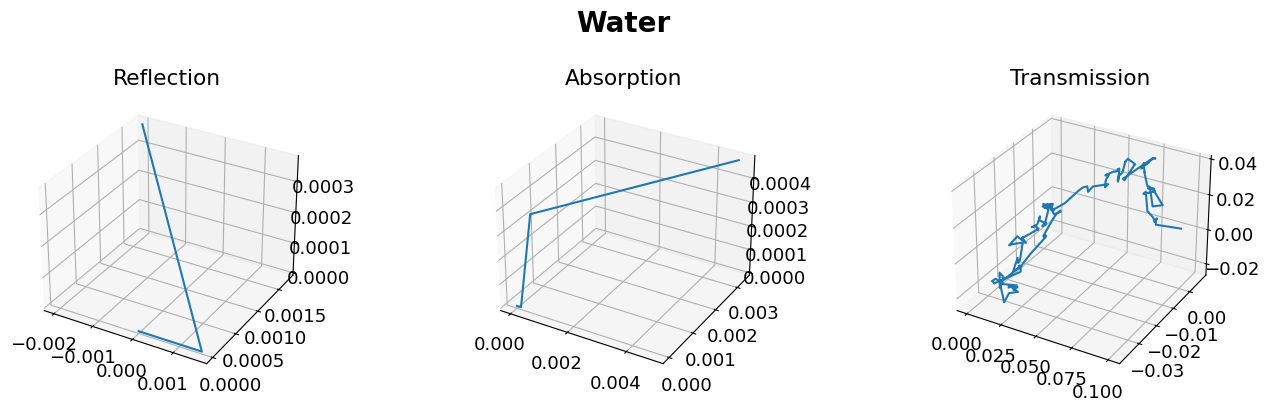

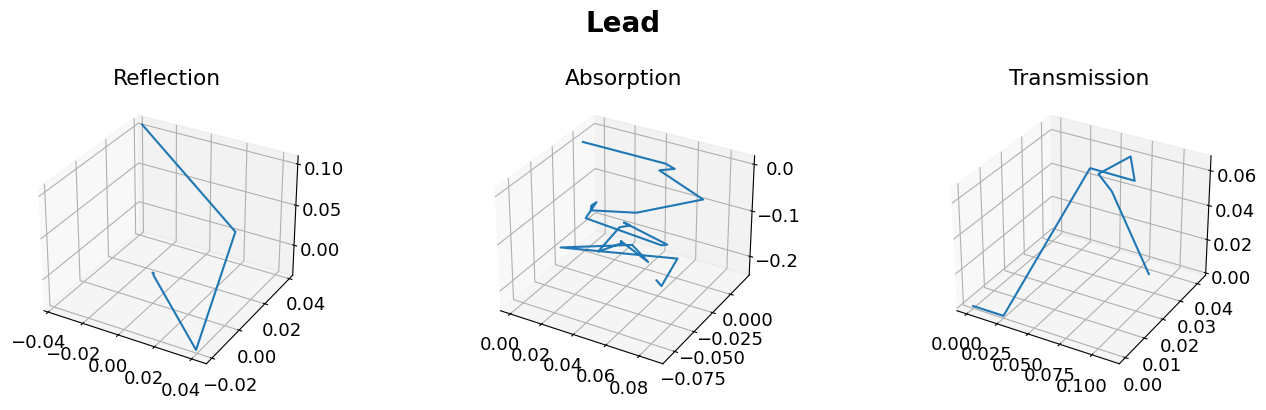

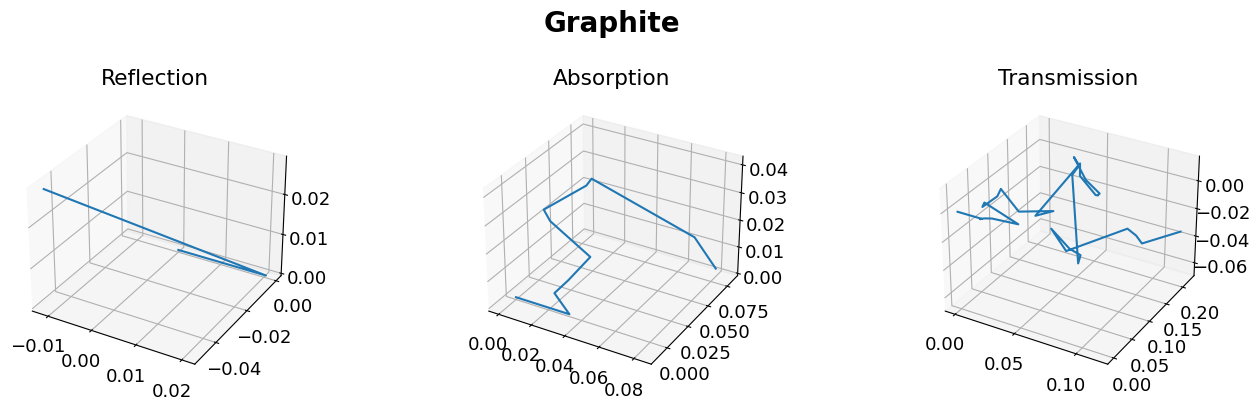

In [19]:
# make plots non-interactive:
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default') 
plt.rc('font', family='DejaVu Sans')
plt.rcParams.update({'font.size':13}) 


# re-define physical parameters:
layer_thickness = 0.1 # in m 
physical_parameters[:,2] = layer_thickness

# defining termination reasons:
termination_reasons = ['Reflection', 'Absorption', 'Transmission']

# iterating over all materials:
for i, material_name in enumerate(material_names):
    
    # defining a new figure for each material, with an overall heading
    fig, axes = plt.subplots(1,3, figsize=(14,4), subplot_kw={'projection':'3d'})
    fig.suptitle(material_name, fontsize=20, fontweight='bold')
    
    # generating neutron histories:
    path_histories = random_walk_collector(physical_parameters[i])
    
    # plotting each history:
    for j, ax in enumerate(axes):
        
        # plotting the path history, labelling each individual plot:
        ax.set_title(termination_reasons[j])
        ax.plot(path_histories[j][:,0], path_histories[j][:,1], path_histories[j][:,2])
        
    # preventing overlap for each figure:
    fig.tight_layout()
    fig.show()

The above graphs show the path taken by a neutron whose path was terminated by each of reflection, absorption, and transmission, for each of water, lead and graphite. This allows us to visually confirm that all reflected neutron paths end by travelling through $x=0$m in the negative direction, all transmitted neutron paths end by travelling through $x=0.1$m in the positive direction, and that all asorbed neutron paths end somewhere between these two points. Examining the above graphs confirms this, and therefore shows the single random walk function to be working properly. This function will now be adapted to model this process for a very large number of neutrons, in an effort to determine the reflection, absorption, and transmission rates for 10cm of each material.

## 4.3 Modelling the Rates of Each Process For a Flux of Neutrons

Using the same general method as used for a single neutron, a large number, or "flux" or neutrons will now be coded, in an effort to determine the overall absorption, transmission and reflection or back-scattering rates. To calculate an accurate overall rate of each process, a large number of particles wil have to be modelled. To calculate the random error on each of these rates as well as minimise the error for the average value, a reasonable number of repeats will have to calculated. In light of the large amount of computation this will require, only the $x$ cooridnates of each particle will be kept track of.

This is coded as a function below. 

In [20]:
def rate_determining_function(start_neutron_number, repeats_number, physical_params):
    
    # unpacking physical parameters, re-defining mfp_tot in m:
    mfp_tot, p_scatter, thickness = physical_params
    mfp_tot = mfp_tot * 10**(-2)
    
    # define a master array of rates, for reflection, absorption, and transmission in column order:
    rates_master_array = np.zeros((repeats_number, 3))
    
    for i in np.arange(repeats_number):
    
        # generate first step:
        x_coordinates = isotropic_exp_vector_generator(mfp_tot, start_neutron_number, True)[:,0]
    
        while len(x_coordinates) > 0:
                    
            # determining reflected and transmitted indicies, updating count of each process
            rates_master_array[i,0] += len(x_coordinates[x_coordinates < 0])
            rates_master_array[i,2] += len(x_coordinates[x_coordinates > thickness])
            
            # removing neutrons that have left the slab:
            x_coordinates = x_coordinates[x_coordinates > 0]
            x_coordinates = x_coordinates[x_coordinates < thickness]
        
            # determining absorbed indicies and updating count:
            random_n_array = np.random.uniform(0, 1, len(x_coordinates))
            rates_master_array[i,1] += len(np.argwhere(random_n_array > p_scatter))
            
            # removing the absorbed neutrons:
            x_coordinates = x_coordinates[random_n_array <= p_scatter]
            
            # calculate next step and update x coordinates:
            x_coordinates += isotropic_exp_vector_generator(mfp_tot, len(x_coordinates), False)[:,0]
            
        # changing rates to percentage
        rates_master_array[i] = rates_master_array[i] * (100 / start_neutron_number)
        
    # calculate standard deviation and mean of rates from repeats 
    rate_errors = np.std(rates_master_array, axis=0)
    average_rates = np.mean(rates_master_array, axis=0)
        
    return average_rates, rate_errors 

Calculating these rates for water, lead and graphite slabs, for a thickness of 10cm:

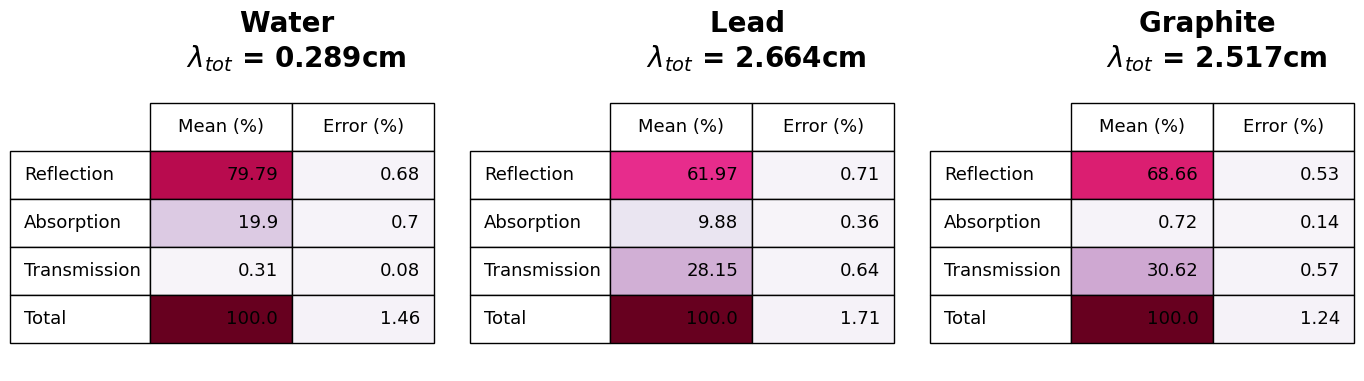

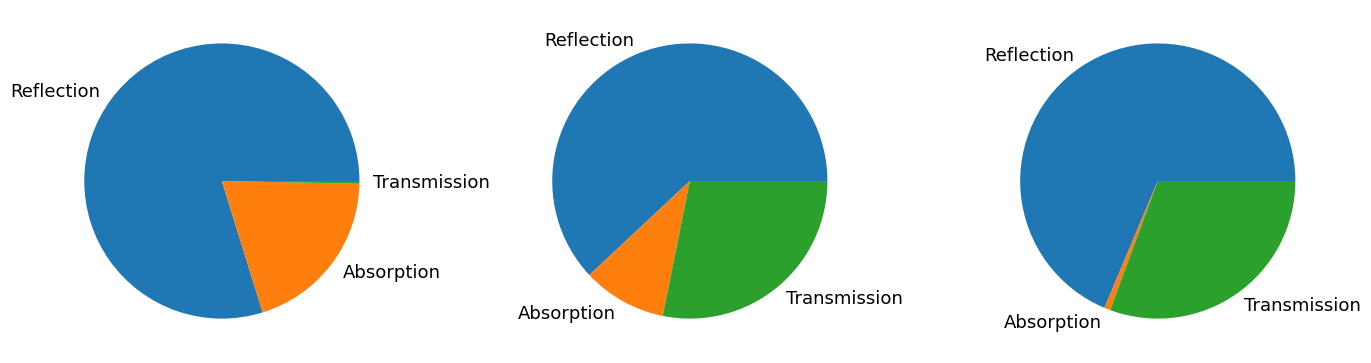

In [21]:
# re-setting plotting font
plt.rc('font', family='DejaVu Sans')
plt.rcParams.update({'font.size':13}) 

# defining the parameters of the rate defining calculation 
layer_thickness = 0.1 # in m
repeat_number = 10
initial_neutron_number = 5000

# updating physical parameters
physical_parameters[:,2] = layer_thickness

# define empty master rates array, preparing figure and axes to plot tables of data:
master_rates = [0,0,0]
fig, axes = plt.subplots(1,3, figsize=(14,4))

# defining general row and column names, and title detailing material name and total mean free path:
process_row_labels = ['Reflection', 'Absorption', 'Transmission', 'Total']
column_names = ['Mean (%)', 'Error (%)']
titles = ['Water \n $\lambda_{tot}$ = ' + '{0:.3f}cm'.format(total_mfps[0]),
          'Lead \n $\lambda_{tot}$ = ' + '{0:.3f}cm'.format(total_mfps[1]),
          'Graphite \n $\lambda_{tot}$ = ' + '{0:.3f}cm'.format(total_mfps[2])]


# calculating rates and errors for each material:
for i, ax in enumerate(axes):
    
    # filling master rate array
    master_rates[i] = rate_determining_function(initial_neutron_number, repeat_number, physical_parameters[i])
    
    # unpacking material specific rates and errors, calculating total rate and total error for safecheck
    (ref_rate, abs_rate, trans_rate), (ref_error, abs_error, trans_error) = master_rates[i]
    total_rate = ref_rate + abs_rate + trans_rate
    total_error = ref_error + abs_error + trans_error
    
    # putting rates and errors in desired table form:
    table_data = np.array([[ref_rate, ref_error], \
                          [abs_rate, abs_error], \
                          [trans_rate, trans_error], \
                          [total_rate, total_error]])

    # removing the physical graph axes to make way for a table, setting titles: 
    ax.axis('off')
    ax.set_title(titles[i], fontweight='bold', fontsize=20)

    # plotting the actual table
    table = ax.table(cellText=np.round_(table_data, decimals=2),
                                       rowLabels=process_row_labels,
                                       colLabels=column_names,
                                       cellColours=plt.cm.PuRd(table_data/100),
                                       loc='center',
                                       colWidths=[0.2 for x in column_names])
    # resizing the table:
    table.scale(3,3)
    
# showing all three tables: 
fig.tight_layout()
plt.show()       

# plotting these as pie charts below:
fig, axes = plt.subplots(1, 3, figsize=(14, 10))
for i, ax in enumerate(axes):
    ax.pie(master_rates[i][0], labels=process_row_labels[:3])
fig.tight_layout()
plt.show()

The above tables and pie charts show the reflection, absorption and transmission percentages for 10cm of water, lead and graphite respectively. The accuracy of the overall simulation was checked by the "Total" percentage row at the bottom of each graph, which is seen to give 100% for each column, with a an uncertainty of roughly 1%. This shows that all neutrons were counted for the above simulation and shows that at least in this respect, the simulation was accurate. 

## 4.4 : Finding the Attenution Length of Each Material

Now that reflection, absorption, and transmission rates have been found for a given thickness of each material, it is possible to extend this to model model neutron penetration for layers of varying thickness. The effect of this is understandable quantatively by measuring considering the so-called "attenuation", $\alpha$, which is defined as the fraction of neutrons transmitted through a given thickness of material, where both reflection and absorption are included as alternative neutron outcomes. This can be shown theoretically to be an exponential relationship, i.e 

$$\alpha = e^{(-t/\tau)} \quad (15),$$

for a thickness $t$ and characteristic thickness $\tau$ defined by equation 12. We can determine $\tau$ for a specific material by finding the transmission fraction $\alpha$ for a range of thicknesses, then fitting equation (15) to determine $\tau$ in the same way done in section (2.2). This will be done by linearising equation 15:

$$\log{(\alpha)} = -\frac{1}{\tau}(t) \quad (15).$$

To start with, the original rate determining function is modified to only return the attenuation and error, making it much more efficient. 

In [22]:
def attenuation_determining_function(start_neutron_number, repeats_number, physical_params):
    
    # unpacking physical parameters, re-defining mfp_tot in m:
    mfp_tot, p_scatter, thickness = physical_params
    mfp_tot = mfp_tot * 10**(-2)
    
    # define a master_array of the transmitted neutrons:
    master_transmission_count = np.zeros(repeats_number)
    
    for i in np.arange(repeats_number):
    
        # generate first step:
        x_coordinates = isotropic_exp_vector_generator(mfp_tot, start_neutron_number, True)[:,0]
    
        while len(x_coordinates) > 0:
                    
            # updating count of transmitted neutrons:
            master_transmission_count[i] += len(x_coordinates[x_coordinates > thickness])
            
            # removing neutrons that have left the slab:
            x_coordinates = x_coordinates[x_coordinates > 0]
            x_coordinates = x_coordinates[x_coordinates < thickness]
        
            # determining and then removing any absorbed neutrons:
            random_n_array = np.random.uniform(0, 1, len(x_coordinates))
            x_coordinates = x_coordinates[random_n_array <= p_scatter]
            
            # calculate next step and update x coordinates:
            x_coordinates += isotropic_exp_vector_generator(mfp_tot, len(x_coordinates), False)[:,0]
        
    # convert count to attenutation fraction for each repeat
    attenuation_array = master_transmission_count / start_neutron_number
    
    # finding mean and standard devition of attenuations:
    attenuation_errors = np.std(attenuation_array, axis=0)
    average_attenuations = np.mean(attenuation_array, axis=0)
        
    return average_attenuations, attenuation_errors

Now the attenuation of 10 different thicknesses will be found for each material:

In [23]:
# defining the calculation parameters in S.I units:
n_thicknesses = 10
n_neutrons = 10000
n_repeats = 10

# define bounds of thicknesses for water, lead and graphite in order
min_thicknesses = [0.01, 0.01, 0.01]
max_thicknesses = [0.05, 0.4, 0.3] 
master_thickness_array = np.zeros((3, n_thicknesses))

# defining and filling the attenuation array for each material:
master_attenuation_array = [[],[],[]]
master_attenuation_error_array = [[],[],[]]

# iterating over all materials:
for i, material_name in enumerate(material_names):
    
    # generating a thickness array for each material
    master_thickness_array[i] = np.geomspace(min_thicknesses[i], max_thicknesses[i], num=n_thicknesses, endpoint=True)
        
    for j, thickness in enumerate(master_thickness_array[i]):
        
        # redefine thickness in physical parameters:
        physical_parameters[i,2] = thickness
        
        # generate attenuation for specific material and thickness, then append to master array:
        attenuation, attenuation_error = attenuation_determining_function(n_neutrons,
                                                                          n_repeats, physical_parameters[i])
        master_attenuation_array[i].append(attenuation)
        master_attenuation_error_array[i].append(attenuation_error)

Now the attenuations will be plotted against thickness for each material:

/var/folders/5c/kbqcwpln44j_d3ylyyl2x3hc0000gn/T/ipykernel_51620/58677651.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


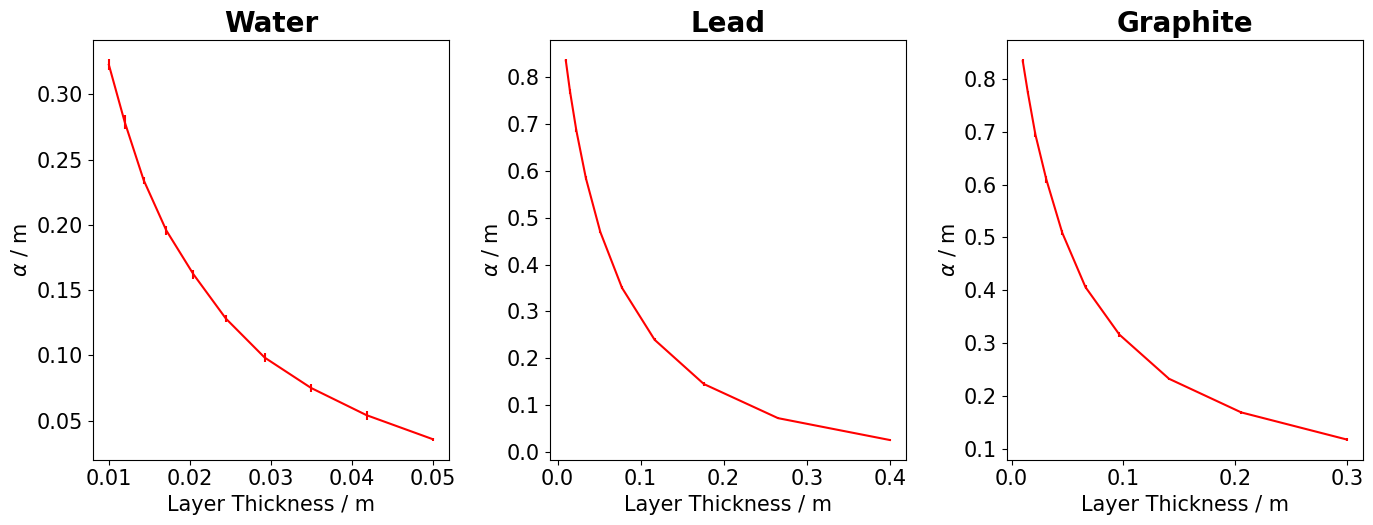

In [24]:
# initiating the plot: 
plt.rcParams.update({'font.size':15}) 
fig, axes = plt.subplots(1,3,figsize=(14,5.5))

# plotting for each material:
for i, ax in enumerate(axes):
    
    # set title and axis labels:
    ax.set_title(material_names[i], fontsize=20, fontweight='bold')
    ax.set_xlabel('Layer Thickness / m')
    ax.set_ylabel(r'$\alpha$ / m')
    ax.errorbar(master_thickness_array[i], master_attenuation_array[i], master_attenuation_error_array[i], fmt='r')
    
# making sure the graphs dont overlap, and then showing:
fig.tight_layout()
fig.show()

Looking at the above graphs, the uniform trend of tending to zero from a positive value shows that $\alpha(T)$ for some thickness $T$ could indeed be an exponential relationship. All three of these data sets will now be fitted to equation determine the characteristic thickness of each material:

/var/folders/5c/kbqcwpln44j_d3ylyyl2x3hc0000gn/T/ipykernel_51620/3991123805.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


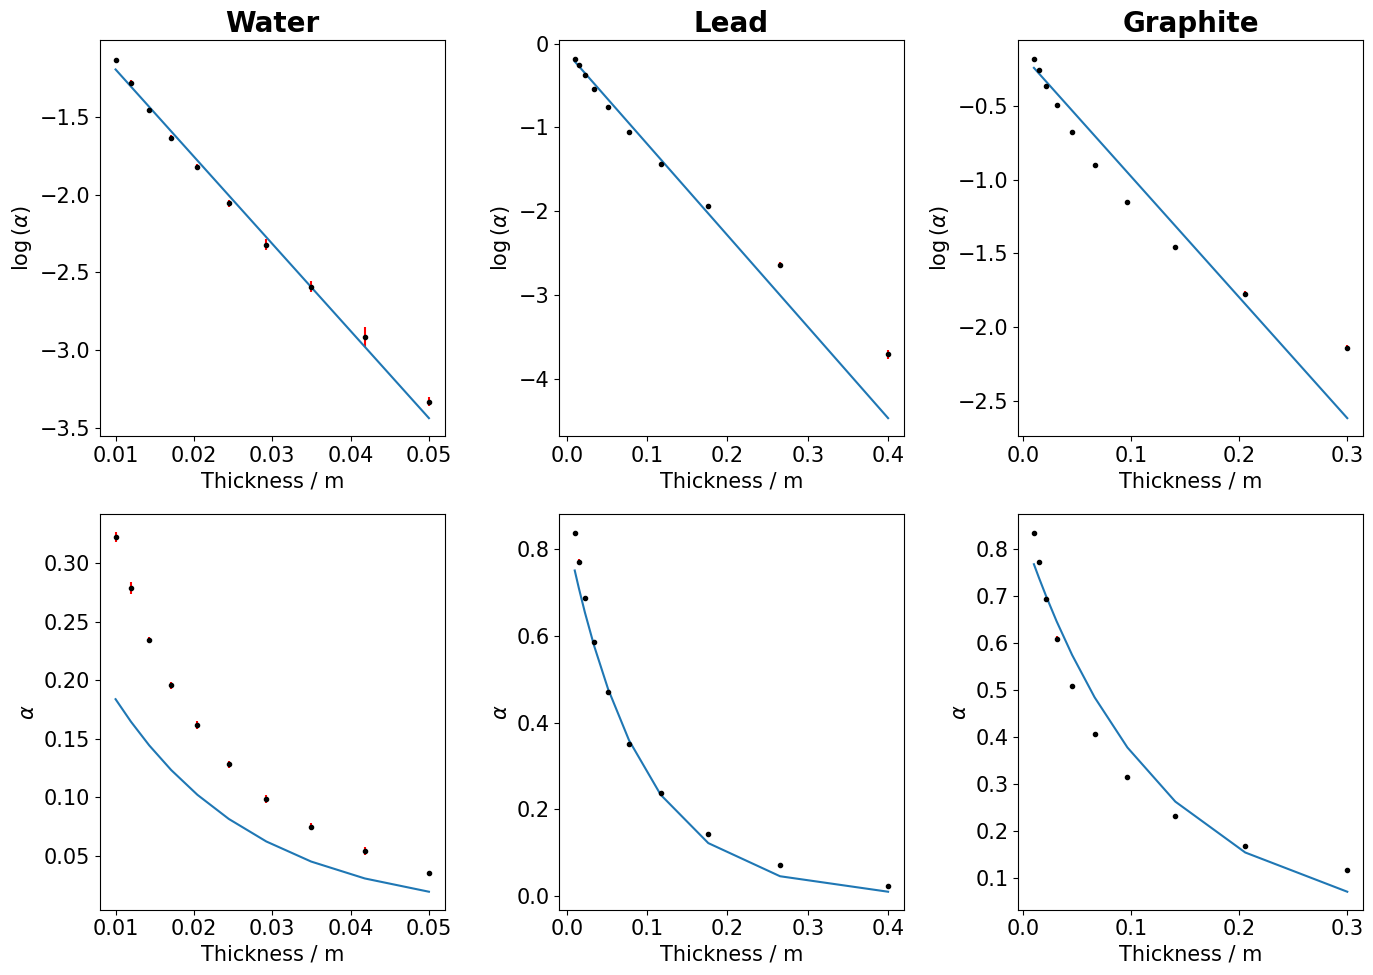

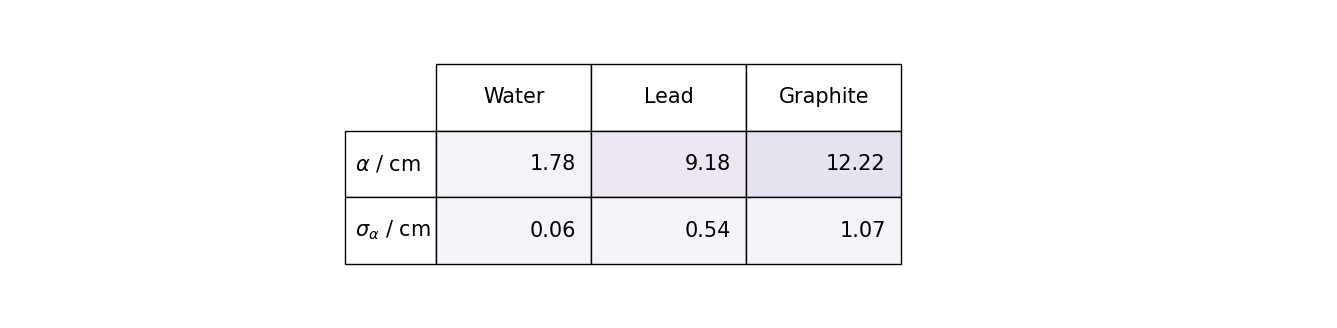

In [25]:
# changing plotting font size and style:
plt.rcParams.update({'font.size':15}) 

# creating master array of attenuation lengths and reduced chi^2 values
tau_array = np.zeros((3, 2))
reduced_chi_array = np.zeros(3)

# creating plot
fig, axes = plt.subplots(2,3, figsize=(14,10))

# repeating for each material:
for i, material_name in enumerate(material_names):
    
    # defining the material specific values:
    alpha_array = np.array(master_attenuation_array[i])
    alpha_error_array = np.array(master_attenuation_error_array[i])
    thicknesses = np.array(master_thickness_array[i])
    
    # defining variables to fit:
    ln_alpha = np.log(alpha_array)
    ln_alpha_errors = np.zeros(len(alpha_array))
    ln_alpha_errors = np.array(alpha_error_array) / np.array(alpha_array) # ln(x) error is the fractional error on x
        
    # removing points with zero error:
    erroneous_indicies = np.argwhere(ln_alpha_errors>0.000001)
    ln_alpha = ln_alpha[erroneous_indicies].flatten()
    thicknesses = thicknesses[erroneous_indicies].flatten()
    alpha_array = alpha_array[erroneous_indicies].flatten()
    alpha_error_array = alpha_error_array[erroneous_indicies].flatten()
    ln_alpha_errors = ln_alpha_errors[erroneous_indicies].flatten()    
    
    # performing fit
    (gradient, intercept), cov_matrix = np.polyfit(thicknesses, ln_alpha, 1, w=(1/ln_alpha_errors), cov=True)
    tau_array[i,0] = 1 / (-gradient)
    tau_array[i,1] = tau_array[i,0] * ((np.diag(cov_matrix)[0] ** 0.5) / -gradient)
    
    # plotting linear and exponential fits:
    # define linear and exponential axes as ax1 and ax2 respectively:
    ax1, ax2 = axes[:,i]
    
    # set axis labels and titles:
    ax1.set_xlabel('Thickness / m')
    ax2.set_xlabel('Thickness / m')
    ax1.set_ylabel(r'$\log{(\alpha)}$')
    ax2.set_ylabel(r'$\alpha$')
    ax1.set_title(material_name, fontsize=20, fontweight='bold')
    
    # plotting fit
    # linear fit:
    ax1.errorbar(thicknesses, ln_alpha, ln_alpha_errors, fmt='k.', ecolor='r')
    ax1.plot(thicknesses, linear_curve(thicknesses, gradient, intercept))
    # exponential fit:
    ax2.errorbar(thicknesses, alpha_array, alpha_error_array, fmt='k.', ecolor='r')
    ax2.plot(thicknesses, alpha_array[0]*exponential_curve(thicknesses, tau_array[i,0]))
    
fig.tight_layout()
fig.show()

# redefining tau array in cm, and unpack into errors and attenuations:
tau_array = tau_array*10**(2)
attenuation_array = tau_array[:,0]
attenuation_error_array = tau_array[:,1]
                                   
# plotting a table of fitted alpha values with errors for each material:
table_data = np.array([attenuation_array, \
                       attenuation_error_array])

row_names = [r'${\alpha}$ / cm', r'${\sigma}_{\alpha}$ / cm']

fig, (ax1, ax, ax2) = plt.subplots(1,3, figsize=(17,4))

# removing all physical axes:
ax1.axis('off')
ax.axis('off')
ax2.axis('off')

table = ax.table(cellText=np.round_(table_data, decimals=2),
                                   rowLabels=row_names,
                                   colLabels=material_names,
                                   cellColours=plt.cm.PuRd(table_data/100),
                                   loc='center',
                                   colWidths=[0.1 for x in material_names])
table.scale(4,4)
plt.show()

Observing the second row of graphs clearly shows that these fits are approximate. A reduced chi squared test should have been conducted for the first row of linear fits, which would allow the range of thicknesses investigated to be taylored to minimse this, and therefore obtain the best fit, although this was outside the scope of the investigation.

# Section 5 : The Woodcock Method

## 5.1 : Introduction to the Woodcock Method

The method used to simulate the above results, as described in section (3), is computationally efficient in the above context, as it only requires geometric analysis to determine whether the neutron has left the material layer, and ends the simulation in this case. Modelling more realistic situations of neutron penetration, i.e in a multi-material reactor or even two layers of material will result in a much larger number of geometric calculations, as neutrons must be allowed to cross boundaries between materials in which they have different mean free paths. 

Attempting to apply the previous method to this situation raises the problem that when a neutron travels along a free path that crosses the boundary between materials, the portion of this path after the boundary is modelled with the wrong mean free path. The most obvious way to fix this is to create a check on every path generated to see if it will result in the neutron crossing a boundary, and then stopping the neutron at this boundary and modelling a second path along the same direction using the mean free path of the new material. However this results in a much larger number of computational steps and results in a much less efficient simulation. One method that is known to account for this without massively increasing computation time is known as the **Woodcock** or **Delta** method, and is introduced below. However modelling more complex geometries using this method is beyond the scope of this investigation. 

## 5.2 : Woodcock Method Theory

The Woodcock Method works by defining a macroscopic cross section $\Sigma_T$ = max$(\Sigma_1, \Sigma_2, ...)$. Using this, steps in any material are distributed by the mean free path $\lambda_T = \frac{1}{\lambda_T}$. We also define a so-called "ficticious step", which is purely a device used by this method (rather than a physical step that the neutron takes), to have a probability of occuring of $1 - \frac{\Sigma_1}{\Sigma_T}$. These are the same as normal steps, but have no direction change, and no probability of absorption or scattering. Therefore for every step, a random number must be generated to see if the step is ficticious or real, which for the latter would involve scattering and absorption, given by the macroscopic absorption and scattering cross sections of that layer, as discussed in section (3). 

# Section 6 : References

[1] G. Marsaglia, "*Random Numbers Fall Mainly In The Planes*", 1968.

[2] R.J Barlow, 1998, "*Statistics: A Guide to the Use of Statistical Methods in the Physical Sciences*", Wiley, 1st Edition, pages 21-22.  